# mnist


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds


In [4]:
mnist,info=tfds.load('fashion_mnist',as_supervised=True,with_info=True)

In [7]:
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [8]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [10]:
train,test=mnist['train'],mnist['test']

In [21]:
train_data,train_label=[],[]
for data in train:
    train_data.append(data[0].numpy())
    train_label.append(data[1].numpy())
    

In [24]:
train_data=np.asarray(train_data,dtype=np.float32)
train_label=tf.one_hot(train_label,depth=10)
train_label=train_label.numpy()

In [26]:
train_label.shape,train_data.shape

((60000, 10), (60000, 28, 28, 1))

In [27]:
test_data,test_label=[],[]
for data in train:
    test_data.append(data[0].numpy())
    test_label.append(data[1].numpy())

test_data=np.asarray(test_data,dtype=np.float32)
test_label=tf.one_hot(test_label,depth=10)
test_label=test_label.numpy()

In [28]:
test_data.shape,test_label.shape

((60000, 28, 28, 1), (60000, 10))

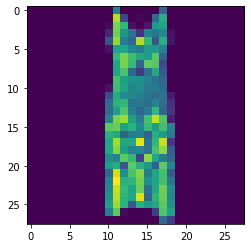

In [29]:
sample_image=test_data[234].reshape((28,28))
plt.imshow(sample_image)

In [30]:
## normalization
train_data=train_data/255


In [33]:
train_data.min()

0.0

In [34]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [36]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),strides=(1,1),padding='VALID',
                 input_shape=(28,28,1),activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),padding='VALID',
                 activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(units=128,activation=tf.nn.relu))
model.add(Dense(units=10))
adam=keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam,loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [39]:
model.fit(train_data,train_label,validation_data=(test_data,test_label),epochs=5,
          batch_size=20,validation_steps=500)

Train on 60000 samples, validate on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.5065 - accuracy: 0.8142 - val_loss: 9.3261 - val_accuracy: 0.8074
Epoch 2/5
60000/60000 [==============================] - 60s 998us/sample - loss: 0.4119 - accuracy: 0.8546 - val_loss: 9.4099 - val_accuracy: 0.8112
Epoch 3/5
60000/60000 [==============================] - 58s 963us/sample - loss: 0.3739 - accuracy: 0.8662 - val_loss: 9.0065 - val_accuracy: 0.8193
Epoch 4/5
60000/60000 [==============================] - 53s 887us/sample - loss: 0.3501 - accuracy: 0.8750 - val_loss: 9.8987 - val_accuracy: 0.8023
Epoch 5/5
60000/60000 [==============================] - 53s 884us/sample - loss: 0.3306 - accuracy: 0.8814 - val_loss: 12.1367 - val_accuracy: 0.7794


In [40]:
metrics=model.history.history
loss=metrics['loss']
val_loss=metrics['val_loss']
acc=metrics['accuracy']
val_acc=metrics['val_accuracy']

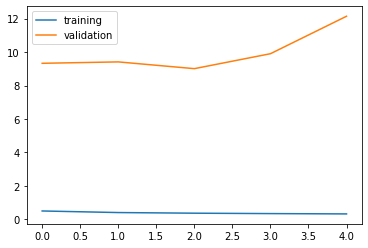

In [43]:
plt.plot(loss,label='training')
plt.plot(val_loss,label='validation')
plt.legend()

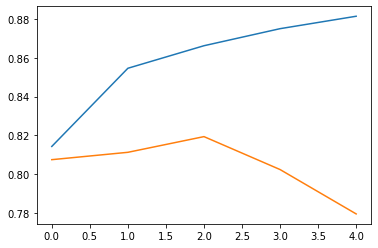

In [44]:
plt.plot(acc)
plt.plot(val_acc)